**Project Check-in 5**

In [ ]:
%pip install --upgrade pip
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
!nbstripout --install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv("./dataset.csv")

1. We chose to run PCA on our data.

2. See below

3. N/A

In [5]:
# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop(columns='Unnamed: 0').drop_duplicates(subset=['track_id','album_name','artists','track_name'])

# Remove columns with every row unique. Also dropping artist and album because it would be too much one-hot encoding
df_cleaned.drop(columns=['track_id', 'track_name', 'artists','album_name', 'popularity', 'duration_ms', 'speechiness'], inplace=True)
df_cleaned.dropna(axis=0,inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
genre = df_cleaned['track_genre']
#The columns with object datatype will be categorical
columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_cleaned = df_cleaned[columns]

scaler = StandardScaler() # Scale the data so that the variances for each feature can be similarly weighted
df_cleaned = scaler.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(df_cleaned, columns=columns)

Text(0.5, 1.0, 'Scree Plot')

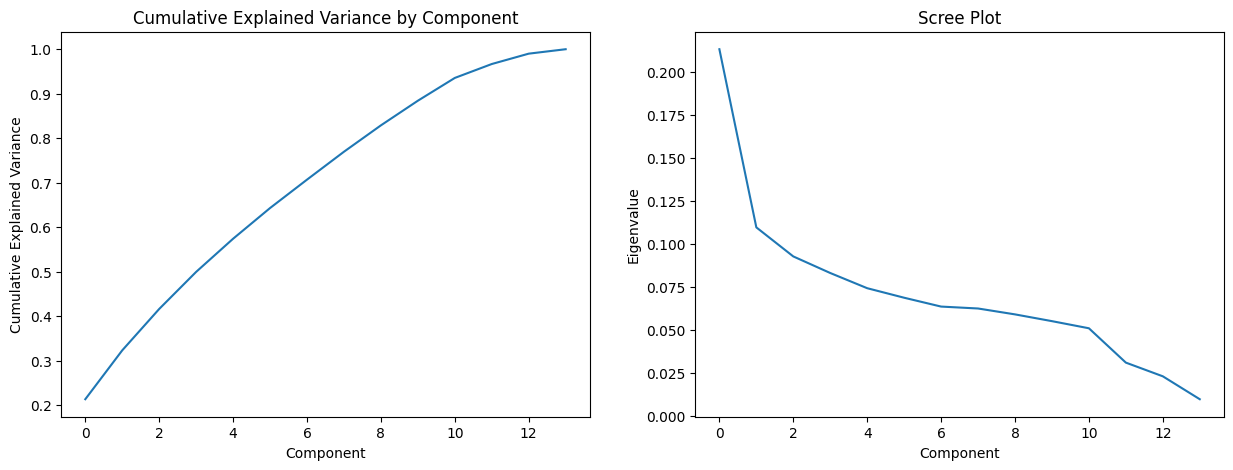

In [3]:
pca = PCA(n_components=14) # 14 principal components for 14 features (don't have to use them all)
transformed_data = pca.fit_transform(df_cleaned)
eigenvalues = pca.explained_variance_ratio_
cumulative_explained_variance = eigenvalues.cumsum()

fig, ax = plt.subplots(1,2, figsize=(15,5))

# For both graphs, the principal component number starts at 0 not 1

# Plot the cumulative explained variance
ax[0].plot(cumulative_explained_variance)
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Cumulative Explained Variance")
ax[0].set_title("Cumulative Explained Variance by Component")

# Plot the eigenvalues to create the scree plot
ax[1].plot(eigenvalues)
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Eigenvalue")
ax[1].set_title("Scree Plot")


4. As our dataset has 14 numerical features, we are trying to see if we can use principal component analysis as a dimensionality reduction technique, in order to reduce the complexity of our data. Judging from the cumulative explained variance graph, it seems like we would still need a decent number of components to accurately describe our data. In future iterations, we were considering clustering prior to PCA, so that we could graph our data on the first 2 principal components and see if the clusters spread out, however, it is unlikely that plotting the first two principal components will capture a lot of the variability in the data, considering that they only make up around 30% of the variance. Given this, the clusters may not be easily separated on the first two components, and will likely heavily overlap.

In [17]:
def euclidean_distance(point_1, point_2):
  return np.sqrt(np.sum((point_1 - point_2)**2))

def compute_inertia(data, cluster_assignments, centroids):
  inertia = 0
  for i in range(data.shape[0]):
    inertia += euclidean_distance(data.loc[i], centroids[int(cluster_assignments[i])])**2
  return inertia

def elbow_method(data, k_range=range(2,150), max_iterations=100, random_state=1):
  inertias = []
  for i in k_range:
    #cluster_assignments, centroids = kmeans(data, i, max_iterations, random_state)
    kmean = KMeans(n_clusters=i, random_state=random_state)
    cluster_assignments = kmean.fit_predict(data)
    inertias.append(kmean.inertia_)
    #centroids = kmean.cluster_centers_
    #inertias.append(compute_inertia(data, cluster_assignments, centroids))
    print(f"{i} Done")
  return inertias

In [18]:
inertias = elbow_method(df_cleaned)



2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done
43 Done
44 Done
45 Done
46 Done
47 Done
48 Done
49 Done
50 Done
51 Done
52 Done
53 Done
54 Done
55 Done
56 Done
57 Done
58 Done
59 Done
60 Done
61 Done
62 Done
63 Done
64 Done
65 Done
66 Done
67 Done
68 Done
69 Done
70 Done
71 Done
72 Done
73 Done
74 Done
75 Done
76 Done
77 Done
78 Done
79 Done
80 Done
81 Done
82 Done
83 Done
84 Done
85 Done
86 Done
87 Done
88 Done
89 Done
90 Done
91 Done
92 Done
93 Done
94 Done
95 Done
96 Done
97 Done
98 Done
99 Done
100 Done
101 Done
102 Done
103 Done
104 Done
105 Done
106 Done
107 Done
108 Done
109 Done
110 Done
111 Done
112 Done
113 Done
114 Done
115 Done
116 Done
117 Done
118 Done
119 Done
120 Done
121 Done
122 Done
123 Done
124 Done

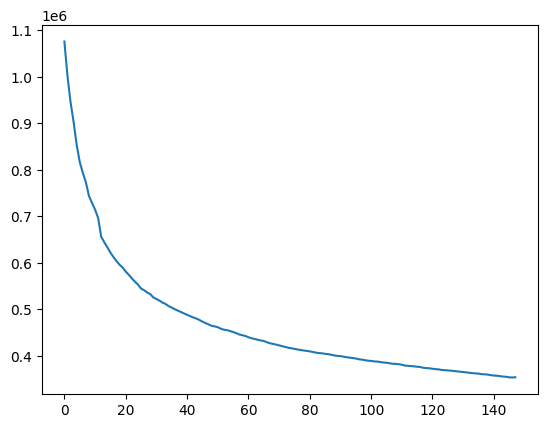

In [19]:
plt.plot(inertias)

In [6]:
kmeans = KMeans(n_clusters=23)
clusters = kmeans.fit_predict(df_cleaned)

In [7]:
print(kmeans.inertia_)
print(silhouette_score(df_cleaned, kmeans.labels_))

388556.4275198142
0.12562108379477033
